# Setting up our envionment

In [69]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Projects/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
'My Drive'/


In [1]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 34.34 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [2]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 827.8MB 13kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17453 sha256=c5497c6d8f5745d6bb38181783e65cbfa5430f856cc10a237c6bb57f92db5323
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [3]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 389kB 20.7MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=40840ef82add33b3ab0221bf404e1c3d65f4408f7b7dcd4c4cc137347bfb9e30
  Stored in directory: /tmp/pip-ephem-wheel-cache-xk2zhqa_/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=2d58236dd60814d879b1611485838bc60965aa9868a82ea0ce194a7c112e4145
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |██████████████████

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [17]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

##THIS CELL NEEDS CHANGED##

!curl -L "https://app.roboflow.com/ds/kl09qbuL7Y?key=n1HTIQ01LW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1102_jpg.rf.46432e964129e1a10ed1369a92940485.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1118_jpg.rf.0a0b12d5412c6b09b8dff4e282fce136.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1119_jpg.rf.37e16d9f51736bebf193974bd2cc281e.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1120_jpg.rf.72030638655f51472877fccbf9832ad0.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1121_jpg.rf.6eaa3ff0c355d13f0ff20414f8243162.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1126_jpg.rf.8be88303305a191cd3e36ba999a391ab.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1129_jpg.rf.a0fc6cc230831992b0e9cecdaa5b1bff.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1139_jpg.rf.d02745075d46e9ecee46

In [18]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

'Indian Vehicle detection.v1-23102020.coco'/   sample_data/
 Monk_Object_Detection/                        Vehicle/


In [19]:
#let's take a peak in train
#jpg images and some coco json annotations
%cd Indian\ Vehicle\ detection.v1-23102020.coco
%ls train

/content/Indian Vehicle detection.v1-23102020.coco
 _annotations.coco.json
 CJN_F2_M1_1000_jpg.rf.4df711a58045db60fd3162d4d2658813.jpg
 CJN_F2_M1_1001_jpg.rf.3121a41ed69eff8acafb50b4698df122.jpg
 CJN_F2_M1_1002_jpg.rf.dc4223a4d12bcffcd17c728e131a01fc.jpg
 CJN_F2_M1_1003_jpg.rf.e79d2a0fe52caef4a2e1de87b08803c7.jpg
 CJN_F2_M1_1004_jpg.rf.593279dc7d32c97efc769940b1ea4b4f.jpg
 CJN_F2_M1_1006_jpg.rf.f7b630ccb992c38e24548b78c2a56d1e.jpg
 CJN_F2_M1_1007_jpg.rf.748621a3b430dbf4a6f1118ab3efbc33.jpg
 CJN_F2_M1_1008_jpg.rf.05d32aa8f4e0151a58552f7f56d9f902.jpg
 CJN_F2_M1_1010_jpg.rf.43da8c939475e41b3240df67c450a4f0.jpg
 CJN_F2_M1_1011_jpg.rf.9115da7ed6ffa5483e351ef7de42408c.jpg
 CJN_F2_M1_1012_jpg.rf.b10fe21b42e842b6bf6a71ae7956b3fb.jpg
 CJN_F2_M1_1013_jpg.rf.a77b378fbc6c88dfcfeb7c92cf5ede59.jpg
 CJN_F2_M1_1014_jpg.rf.d4307b632d9b520676aa24553431fddc.jpg
 CJN_F2_M1_1015_jpg.rf.f82f510f0bbf07c34330607263de61a2.jpg
 CJN_F2_M1_1017_jpg.rf.93307d2084ddc2854f9356f33e23c740.jpg
 CJN_F2_M1_1018_jpg.rf.4c

In [20]:
#let's take a peek at the annotations
#class categories, and bounding boxes are provided for our train set
#%pycat train/_annotations.coco.json

In [21]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir Vehicle
!mkdir Vehicle/annotations
!mkdir Vehicle/Annotations
!mkdir Vehicle/Images

In [22]:
%cp train/_annotations.coco.json Vehicle/annotations/instances_Images.json

In [23]:
%cp train/*.jpg Vehicle/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [24]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [25]:
from train_detector import Detector

In [26]:
gtf = Detector();

In [27]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Vehicle";
img_dir = "./";
set_dir = "Images";

In [28]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, use_gpu=True)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [29]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [30]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [32]:
%%time
gtf.Train(num_epochs=50, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be i

CPU times: user 48min, sys: 11min 17s, total: 59min 18s
Wall time: 1h 1min 45s


In [34]:
gtf.Train(num_epochs=15, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be i

In [35]:
gtf.Train(num_epochs=8, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be i

In [ ]:
gtf.Train(num_epochs=8, model_output_dir="trained/");

# Export Trained Weights

In [39]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [41]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
%cd /content

/content


In [72]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [73]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=c8c2b1bc298c7f8b1c899ffa816fa8f07ddf0d7f80e27dc7af87fdae6db08535
  Stored in directory: /tmp/pip-ephem-wheel-cache-xaocwr5y/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [87]:
#recover trained weights
!mkdir '/trained'
#note these are old weights that I didn't train for too long
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-10-23-17:36.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-10-23-17:36.pth' '/trained/signatrix_efficientdet_coco.pth'

In [88]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [89]:
from infer_detector import Infer
gtf = Infer();

In [90]:
%cd Indian\ Vehicle\ detection.v1-23102020.coco

/content/Indian Vehicle detection.v1-23102020.coco/Indian Vehicle detection.v1-23102020.coco


In [92]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [93]:
#download some test data
!curl -L "https://app.roboflow.com/ds/kl09qbuL7Y?key=n1HTIQ01LW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1102_jpg.rf.46432e964129e1a10ed1369a92940485.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1118_jpg.rf.0a0b12d5412c6b09b8dff4e282fce136.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1119_jpg.rf.37e16d9f51736bebf193974bd2cc281e.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1120_jpg.rf.72030638655f51472877fccbf9832ad0.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1121_jpg.rf.6eaa3ff0c355d13f0ff20414f8243162.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1126_jpg.rf.8be88303305a191cd3e36ba999a391ab.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1129_jpg.rf.a0fc6cc230831992b0e9cecdaa5b1bff.jpg  
 extracting: Indian Vehicle detection.v1-23102020.coco/test/CJN_F2_M1_1139_jpg.rf.d02745075d46e9ecee46

In [94]:
!ls test

_annotations.coco.json
CJN_F2_M1_1005_jpg.rf.cb3b5ea6ab1eb862fab95b16701a43f8.jpg
CJN_F2_M1_1009_jpg.rf.8de49cb46c43f0f2aeea69f05001c6dd.jpg
CJN_F2_M1_1025_jpg.rf.ece963e4b753feac81912c2725476b46.jpg
CJN_F2_M1_1030_jpg.rf.f2d457627a3100bebd818123b9102429.jpg
CJN_F2_M1_1032_jpg.rf.4e252b048a9aa82211ad1e0fa145b182.jpg
CJN_F2_M1_1045_jpg.rf.85decad8056044fd5a0d7520af9e9a3f.jpg
CJN_F2_M1_1047_jpg.rf.23dad2703c1bde421c2b561d6cbb5fc0.jpg
CJN_F2_M1_1058_jpg.rf.39d6cdd66940fad1d53df0320bfda3c7.jpg
CJN_F2_M1_1059_jpg.rf.6deacb15f4925d2e99b52db4723cce11.jpg
CJN_F2_M1_1061_jpg.rf.ecbdb5a40dc486c3188f440d88bb8c7d.jpg
CJN_F2_M1_1084_jpg.rf.b7ccc98ca61c7e69f8317335ce06898d.jpg
CJN_F2_M1_1098_jpg.rf.c0e13bd85241894e875dc697c9e93949.jpg
CJN_F2_M1_1102_jpg.rf.46432e964129e1a10ed1369a92940485.jpg
CJN_F2_M1_1118_jpg.rf.0a0b12d5412c6b09b8dff4e282fce136.jpg
CJN_F2_M1_1119_jpg.rf.37e16d9f51736bebf193974bd2cc281e.jpg
CJN_F2_M1_1120_jpg.rf.72030638655f51472877fccbf9832ad0.jpg
CJN_F2_M1_1121_jpg.rf.6eaa3ff0c35

In [95]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [96]:
class_list

['vehicles',
 'Auto Rickshaw',
 'Bicycle',
 'Bike',
 'Bus',
 'Car',
 'Cycle Rickshaw',
 'Scooter',
 'Tempo',
 'Tractor',
 'Truck']

In [103]:
%%time
#bang!
img_path = "test/KGC_F4_M1_1696_jpg.rf.8baa8223ad9ff789441f60bf75139b5c.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.043s)
CPU times: user 83.3 ms, sys: 4.06 ms, total: 87.3 ms
Wall time: 85.4 ms


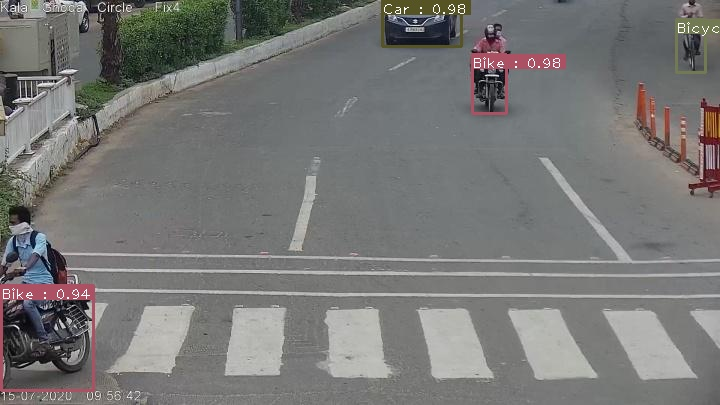

In [104]:
from IPython.display import Image
Image(filename='output.jpg') 

Done. (0.038s)


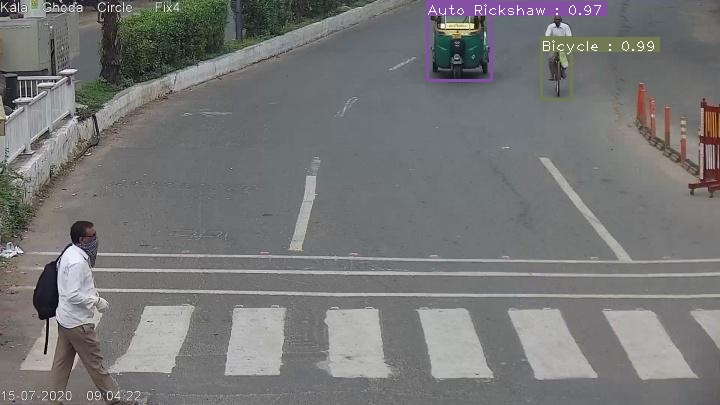

In [105]:
img_path = "test/KGC_F4_M1_131_jpg.rf.65a744e6c825223e7331077d144bd3c1.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

from IPython.display import Image
Image(filename='output.jpg')

Done. (0.038s)


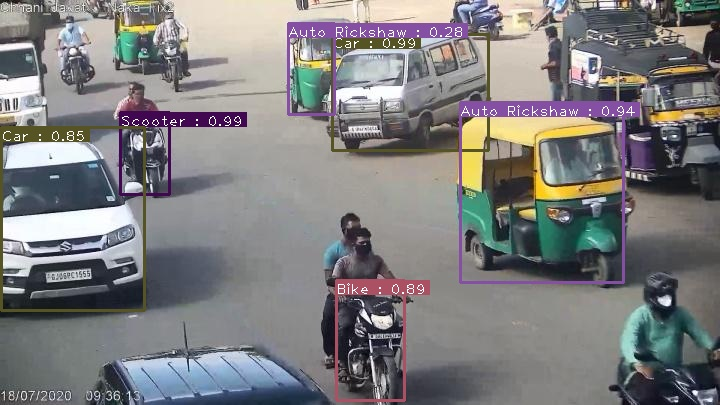

In [106]:
img_path = "test/CJN_F2_M1_1084_jpg.rf.b7ccc98ca61c7e69f8317335ce06898d.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

from IPython.display import Image
Image(filename='output.jpg')

Done. (0.044s)


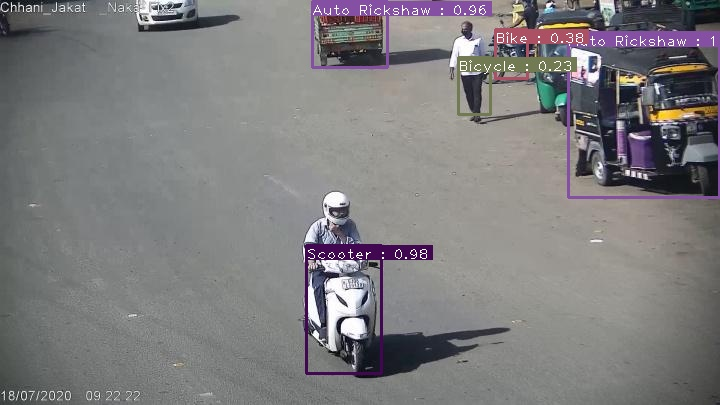

In [107]:
img_path = "test/CJN_F2_M1_670_jpg.rf.21a974a293e52130f3753f3c1fec4f19.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

from IPython.display import Image
Image(filename='output.jpg')

Done. (0.039s)


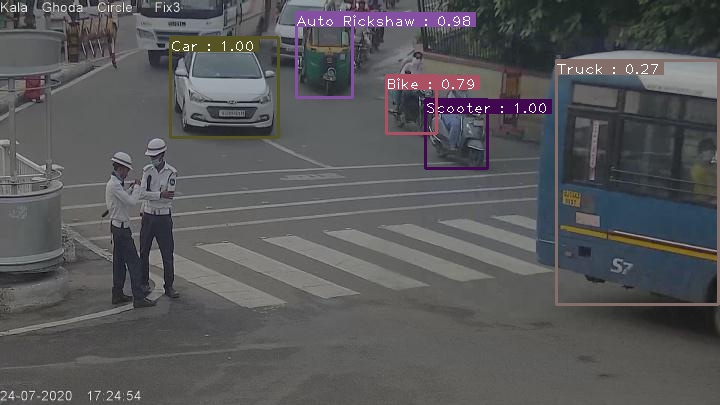

In [108]:
img_path = "test/KGC_F3_E4-resized_1617_jpg.rf.00d44c10e9365719ddbcd5cb66228fe9.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

from IPython.display import Image
Image(filename='output.jpg')